### Import modules

In [28]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


### Import Dataset

In [2]:
 pd.set_option('display.max_columns', None)
workers_df = pd.read_csv("../data/raw/factory_workers.csv", sep=',', encoding="mac_roman")

In [3]:
workers_df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_fname,sup_lname,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,event_week_in_series,event_day_in_series,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.489,Efficacy,None,1.2,None,None
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.023,Efficacy,None,0.8,None,None
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714285714,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,Susan,Dahl,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None


### Drop Unnecessary Columns

In [4]:
# drop unnecessary columns
unnecessary_cols = ['sub_fname', 'sub_lname','sub_coll_IDs', 'sub_colls_same_sex_prtn','sup_fname', 'sup_lname','event_week_in_series',
 'event_day_in_series','event_weekday_num', 'event_weekday_name', 'recorded_note_from_sup', 'record_conf_matrix_h', 
                   'behav_cause_h', 'record_cause']

workers_df.drop(columns=unnecessary_cols, inplace=True)

In [5]:
# drop all rows with production director as sub_role
workers_df = workers_df[workers_df['sub_role'] != 'Production Director']

In [6]:
# check df
workers_df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,behav_comptype_h,actual_efficacy_h,record_comptype,recorded_efficacy
0,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None
1,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,1.489,Efficacy,1.2
2,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None
3,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,1.023,Efficacy,0.8
4,98000003,20,F,Shift 1,Team 3,Team Leader,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None


In [7]:
workers_df.groupby('sub_ID')['sub_ID'].unique().count()

686

There are only 686 unique worker IDs in the dataframe.

### Create target variable column

In [8]:
# create a binary column based on whether a worker resigned or not
workers_df['Resigned'] = [1 if x == 'Resignation' else 0 for x in workers_df['behav_comptype_h']]

### Feature Engineering: Encode Categorical Variables

In [9]:
# Get a list of relevant events
relevant_events = list(workers_df['behav_comptype_h'].unique())
sabotage = relevant_events[-1]
relevant_events = relevant_events[:10]
relevant_events.append(sabotage)
relevant_events

['Presence',
 'Efficacy',
 'Feat',
 'Slip',
 'Sacrifice',
 'Lapse',
 'Idea',
 'Teamwork',
 'Absence',
 'Disruption',
 'Sabotage']

There are 11 relevnat event types an employee can accomplish on any given day.

***Count the number of instances each employee had an underrecorded efficacy score***

In [10]:
# Find a count of underrecorded efficacy for each employee
underrecorded_efficacies = workers_df[workers_df['recorded_efficacy'] < workers_df['actual_efficacy_h']]
underrecorded_efficacies

# Group underrecorded efficacies by sub_ID and get count
efficacy = underrecorded_efficacies.groupby('sub_ID')['recorded_efficacy'].count().reset_index()

# Rename col
efficacy.rename(columns={'recorded_efficacy':'Num Underrecorded Efficacy'}, inplace=True)
efficacy.sort_values(by='Num Underrecorded Efficacy', ascending=False).head()

,sub_ID,Num Underrecorded Efficacy
347,98000425,213
447,98000539,213
156,98000195,212
95,98000123,211
495,98000600,211


***Count the number of instances each employee had a mismatched relevant event recorded***

In [11]:
# Filter df based on relevant events
relevant_events_df = workers_df[workers_df['behav_comptype_h'].isin(relevant_events)]

In [12]:
# Find a count of mismatched recorded events for each employee
mismatched_events = relevant_events_df[relevant_events_df['behav_comptype_h'] != relevant_events_df['record_comptype']]

# Group by sub_ID and get a count of each mismatched event
events = mismatched_events.groupby('sub_ID')['behav_comptype_h'].count().reset_index()

# Rename column and sort
events.rename(columns={'behav_comptype_h':'Num Mismatched Events'}, inplace=True)
events.sort_values('Num Mismatched Events', ascending=False).head()

,sub_ID,Num Mismatched Events
415,98000532,15
426,98000547,15
100,98000137,12
264,98000349,12
167,98000219,12


In [13]:
# Merge Mismatched Efficacies and Events 
new_features = efficacy.merge(events, left_on='sub_ID', right_on='sub_ID', how='left')
new_features.head()

,sub_ID,Num Underrecorded Efficacy,Num Mismatched Events
0,98000001,185,7.0
1,98000002,202,4.0
2,98000003,194,6.0
3,98000004,183,5.0
4,98000005,181,5.0


In [14]:
# fill missing values for Mismatched events column with 0
new_features.fillna(0, inplace=True)

# Convert data type to int for mismatched events col
new_features['Num Mismatched Events'] = new_features['Num Mismatched Events'].astype('int')
new_features.dtypes

sub_ID                        int64
Num Underrecorded Efficacy    int64
Num Mismatched Events         int64
dtype: object

In [15]:
# Merge new features to original dataframe
merged_df = workers_df.merge(new_features, left_on='sub_ID', right_on='sub_ID')

### Drop Some Categorical Features

In [16]:
# drop features already encoded
features_to_drop = ['behav_comptype_h', 'record_comptype', 'actual_efficacy_h', 'recorded_efficacy']
df = merged_df.drop(columns=features_to_drop)

In [17]:
df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,Resigned,Num Underrecorded Efficacy,Num Mismatched Events
0,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,0,185,7
1,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,0,185,7
2,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/4/2021,0,185,7
3,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/4/2021,0,185,7
4,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/5/2021,0,185,7


### Drop Duplicate Rows

In [18]:
# drop duplicate rows based on last event date
# df = merged_df.sort_values('event_date').drop_duplicates('sub_ID', keep='last')
# df = df.sort_values('sub_ID')

# Convert event_date col to datetime 
#df['event_date'] = pd.to_datetime(df['event_date'])

### Create Dummy Variables for Categorical Features

In [19]:
# Features to encode
cat_vars = ['sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_workstyle_h', 'sup_sex', 'sup_role']

In [20]:
# Get dummy variables
df = pd.get_dummies(df, columns=cat_vars, prefix=cat_vars)

In [21]:
# Inspect encoded features
df.head()

,sub_ID,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_ID,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,Resigned,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Production Director,sup_role_Shift Manager,sup_role_Team Leader
0,98000001,40,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,98000216,24,-16,0.842,0.948,0.971,1/1/2021,0,185,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
1,98000001,40,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,98000216,24,-16,0.842,0.948,0.971,1/1/2021,0,185,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
2,98000001,40,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,98000216,24,-16,0.842,0.948,0.971,1/4/2021,0,185,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
3,98000001,40,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,98000216,24,-16,0.842,0.948,0.971,1/4/2021,0,185,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
4,98000001,40,0.895,1.0,0.659,0.592,0.799,0.501,0.484,0.676,98000216,24,-16,0.842,0.948,0.971,1/5/2021,0,185,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [22]:
# drop dummy feature with production director supervisor role
df.drop(columns=['sup_role_Production Director'], inplace=True)

In [23]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411133 entries, 0 to 411132
Data columns (total 62 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sub_ID                      411133 non-null  int64  
 1   sub_age                     411133 non-null  int64  
 2   sub_health_h                411133 non-null  float64
 3   sub_commitment_h            411133 non-null  float64
 4   sub_perceptiveness_h        411133 non-null  float64
 5   sub_dexterity_h             411133 non-null  float64
 6   sub_sociality_h             411133 non-null  float64
 7   sub_goodness_h              411133 non-null  float64
 8   sub_strength_h              411133 non-null  float64
 9   sub_openmindedness_h        411133 non-null  float64
 10  sup_ID                      411133 non-null  object 
 11  sup_age                     411133 non-null  object 
 12  sup_sub_age_diff            411133 non-null  object 
 13  sup_commitment

### Fix data types

In [24]:
# get features with object types to convert to int
o_types = df.select_dtypes(include=['object'], exclude=['datetime']).columns.to_list()

# convert to num type
df[o_types] = df[o_types].apply(pd.to_numeric, errors='coerce')

## Check for Class Imbalance

In [25]:
# get class counts
class_counts = df['Resigned'].value_counts()
class_counts

0    411057
1        76
Name: Resigned, dtype: int64

In [26]:
# format counts as a percentage of df
class_percentages = pd.Series([(x/df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    99.981514
1     0.018486
dtype: float64

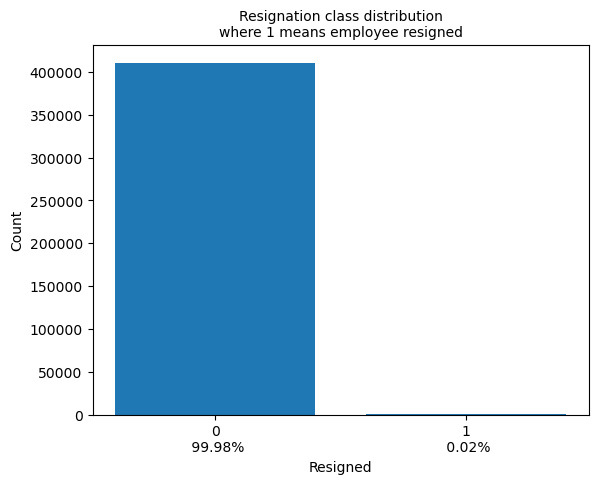

In [27]:
# visualize class balance

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(2).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Resigned')
ax.set_title('Resignation class distribution\nwhere 1 means employee resigned',
              fontsize = 10)
plt.show()

Since the dataset is highly imbalanced, this needs to be handled before any modelling can be done. 

### Create feature matrix and target column and train/test splits

In [29]:
# Create target variable and feature matrix
X = df.drop(columns=['sub_ID', 'sup_ID', 'event_date', 'Resigned'])
y = df['Resigned']

In [30]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
# View train set
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
399997,29,0.733,0.921,0.875,0.914,0.509,0.868,0.801,0.996,59,30,0.629,0.678,0.686,82,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
278564,30,0.895,0.581,0.778,0.776,0.514,0.792,0.715,0.914,44,14,0.678,0.999,0.737,181,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
335812,58,0.814,0.740,0.843,0.963,0.646,0.789,0.562,0.904,29,-29,0.683,0.384,0.436,159,7,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
228842,63,0.756,0.755,0.776,0.789,0.561,0.569,0.892,0.822,25,-38,0.871,0.786,0.771,178,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
203287,63,0.821,0.640,0.680,0.771,0.830,0.838,0.740,0.659,31,-32,0.762,0.494,0.799,164,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


### Upsample Minority Class using Random Oversampling in Train split only

## Check if class proportions preserved in splits

In [32]:
# check if class imbalanced preserved in splits
# def plot_y_ratios(y, ytest):
#     fig, ax = plt.subplots(2, sharex = True)
#     ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
#                                     y[y == 1].count()])
#     ax[0].set_ylabel('train', fontsize = 8)
#     ax[0].set_ylim(0, 125)
#     ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
#                                     ytest[ytest == 1].count()])
#     ax[1].set_ylabel('test', fontsize = 8)
#     ax[1].set_ylim(0, 125)
#     ax[1].set_xticks([0, 1])
#     ax[0].tick_params(which = 'both', labelsize = 8)
#     ax[1].tick_params(which = 'both', labelsize = 8)
#     ax[1].set_xlabel('Did not resign\n(0 = no resignation)', fontsize = 8)
#     ax[0].set_title('% Resigned (where 1 means employee resigned):\n' +
#                     'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
#                     '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
#                    fontsize = 10)
#     plt.show() 

In [33]:
# plot_y_ratios(y_train, y_test)

Class proportions seemed to be preserved in the splits. Check to see if using the `stratify` argument of `train_test_split` makes any difference

### Try to better preserve the class proportions from the original dataset


In [34]:
# # split data with stratify argument
# X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify = y)

# # check ratios
# plot_y_ratios(y_train_strat, y_test_strat)

Class proportions are also preserved with `stratify` attribute. Will use original `train_test_split` results.

### Preprocessing: Standardize Numeric Features

Standardize after splitting into train and test sets to avoid data leakage, over-optimistic results and unrealistic performance evaluations.

In [35]:
# # Get numeric features
# num_features = ['sub_age', 'sub_health_h', 'sub_commitment_h',
#        'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h',
#        'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h',
#        'Num Underrecorded Efficacy', 'Num Mismatched Events', 'sup_age', 'sup_sub_age_diff',
#                'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h']

In [36]:
# # instantiate scaler
# SS_scaler = StandardScaler()

# # fit values to scaler
# SS_scaler.fit(X_train[num_features])

# # Get standardized values as a new df
# X_train[num_features] = SS_scaler.transform(X_train[num_features])

# # Transform test features
# X_test[num_features] = SS_scaler.transform(X_test[num_features])


In [37]:
# View train set with updated scaled values
# X_train.head()

In [38]:
# view scaled test set
# X_test.head()

### Visualize new scaled features

In [39]:
# # View new standardized train features
# scaled_data = pd.DataFrame(X_train[num_features], columns=num_features)

# # Visualize shape of features 
# scaled_data.hist(figsize=(15,15))
# plt.show()

### Check for Outliers with Boxplots

In [40]:
# for feature in X_train[num_features].columns:
#     X_train[[feature]].boxplot()
#     plt.show()

## Export train and test data

In [41]:
try:
    X_train.to_csv('../data/processed/X_train.csv', index=False)
    X_test.to_csv('../data/processed/X_test.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False)
    y_test.to_csv('../data/processed/y_test.csv', index=False)
except:
    print('Could not export.')